# London House Price Prediction

This notebook builds a machine learning model to predict house prices in London.

The approach includes:

- Comprehensive data preprocessing and missing value handling
- Feature engineering including property characteristics and location data
- Feature scaling using robust methods
- Linear Regression modeling
- Performance evaluation using multiple metrics (MSE, R²)
- Train-validation split to verify model performance

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/london-house-price-prediction-advanced-techniques/sample_submission.csv
/kaggle/input/london-house-price-prediction-advanced-techniques/train.csv
/kaggle/input/london-house-price-prediction-advanced-techniques/test.csv


In [ ]:
# Load data
train_data=pd.read_csv("/kaggle/input/london-house-price-prediction-advanced-techniques/train.csv")
test_data=pd.read_csv("/kaggle/input/london-house-price-prediction-advanced-techniques/test.csv")

In [ ]:
# Display info about training data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266325 entries, 0 to 266324
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   266325 non-null  int64  
 1   fullAddress          266325 non-null  object 
 2   postcode             266325 non-null  object 
 3   country              266325 non-null  object 
 4   outcode              266325 non-null  object 
 5   latitude             266325 non-null  float64
 6   longitude            266325 non-null  float64
 7   bathrooms            217846 non-null  float64
 8   bedrooms             241482 non-null  float64
 9   floorAreaSqM         252519 non-null  float64
 10  livingRooms          229285 non-null  float64
 11  tenure               260604 non-null  object 
 12  propertyType         265817 non-null  object 
 13  currentEnergyRating  209511 non-null  object 
 14  sale_month           266325 non-null  int64  
 15  sale_year        

In [ ]:
# Display first few rows of data 
train_data.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,ID,fullAddress,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,currentEnergyRating,sale_month,sale_year,price
0,0,"38 Adelina Grove, London, E1 3AD",E1 3AD,England,E1,51.519406,-0.053261,NaN,3.0,80.0,1.0,Freehold,Semi-Detached House,C,1,1995,77000
1,1,"6 Cleveland Grove, London, E1 4XL",E1 4XL,England,E1,51.521261,-0.053384,2.0,4.0,110.0,1.0,Leasehold,Terrace Property,D,1,1995,89995
2,2,"65 Sanderstead Road, London, E10 7PW",E10 7PW,England,E10,51.569054,-0.034892,1.0,3.0,84.0,1.0,Freehold,Terrace Property,D,1,1995,59000
3,3,"5 Queenswood Gardens, London, E11 3SE",E11 3SE,England,E11,51.564212,0.026292,NaN,2.0,72.0,1.0,Leasehold,Purpose Built Flat,NaN,1,1995,51500
4,4,"12 Woodlands Road, London, E11 4RW",E11 4RW,England,E11,51.563430,0.006260,1.0,3.0,104.0,1.0,Freehold,Mid Terrace House,D,1,1995,63500


In [ ]:
# Check unique values in country column
train_data["country"].unique()

array(['England'], dtype=object)

# Data Preprocessing

In [ ]:
# Remove unnecessary columns that won't help with prediction
# Address information is redundant when we have latitude/longitude and outcode
train_data.drop(["fullAddress", "postcode","country"], axis=1, inplace=True)
test_data.drop(["fullAddress", "postcode", "country"], axis=1, inplace=True)

In [ ]:
# Get statistical summary of the data
train_data.describe()

,ID,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,sale_month,sale_year,price
count,266325.000000,266325.000000,266325.000000,217846.000000,241482.000000,252519.000000,229285.000000,266325.000000,266325.000000,2.663250e+05
mean,133162.000000,51.510090,-0.104639,1.439471,2.496140,99.624088,1.292160,6.805670,2012.213855,6.161788e+05
std,76881.549558,0.056709,0.088074,0.721365,1.172209,56.454683,0.583029,3.356693,9.143113,1.274105e+06
min,0.000000,51.385708,-0.347055,1.000000,1.000000,10.000000,1.000000,1.000000,1995.000000,1.000000e+04
25%,66581.000000,51.466685,-0.159167,1.000000,2.000000,63.000000,1.000000,4.000000,2004.000000,2.165000e+05
50%,133162.000000,51.507202,-0.108622,1.000000,2.000000,85.000000,1.000000,7.000000,2014.000000,3.850000e+05
75%,199743.000000,51.550937,-0.049202,2.000000,3.000000,118.000000,1.000000,10.000000,2021.000000,6.500000e+05
max,266324.000000,51.665823,0.139249,9.000000,9.000000,500.000000,9.000000,12.000000,2023.000000,1.000000e+08


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266325 entries, 0 to 266324
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   266325 non-null  int64  
 1   outcode              266325 non-null  object 
 2   latitude             266325 non-null  float64
 3   longitude            266325 non-null  float64
 4   bathrooms            217846 non-null  float64
 5   bedrooms             241482 non-null  float64
 6   floorAreaSqM         252519 non-null  float64
 7   livingRooms          229285 non-null  float64
 8   tenure               260604 non-null  object 
 9   propertyType         265817 non-null  object 
 10  currentEnergyRating  209511 non-null  object 
 11  sale_month           266325 non-null  int64  
 12  sale_year            266325 non-null  int64  
 13  price                266325 non-null  int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 28.4+ MB


In [ ]:
# Check for missing values
train_data.isna().sum()/len(train_data)*100

ID                      0.000000
outcode                 0.000000
latitude                0.000000
longitude               0.000000
bathrooms              18.202948
bedrooms                9.328077
floorAreaSqM            5.183892
livingRooms            13.907819
tenure                  2.148127
propertyType            0.190744
currentEnergyRating    21.332582
sale_month              0.000000
sale_year               0.000000
price                   0.000000
dtype: float64

In [ ]:
# Remove rows with missing values in critical columns
# These columns have minimal missing values and are important for prediction
train_data.dropna(subset=["floorAreaSqM","tenure", "propertyType"], inplace=True)

# Missing Value Imputation

In [ ]:
# Check skewness to decide imputation strategy
print("Skewness of bathrooms:", train_data["bathrooms"].skew())

Skewness of bathrooms: 2.066406536673363


In [ ]:
# High skew, use median for imputation
train_data["bathrooms"]=train_data["bathrooms"].fillna(train_data["bathrooms"].median())
test_data["bathrooms"]=test_data["bathrooms"].fillna(test_data["bathrooms"].median())

In [ ]:
print("Skewness of bedrooms:", train_data["bedrooms"].skew())

Skewness of bedrooms: 0.8206355526737832


In [ ]:
# Lower skew, use mean for imputation
train_data["bedrooms"]=train_data["bedrooms"].fillna(train_data["bedrooms"].mean())
test_data["bedrooms"]=test_data["bedrooms"].fillna(test_data["bedrooms"].mean())

In [ ]:
print("Skewness of livingRooms:", train_data["livingRooms"].skew())

Skewness of livingRooms: 2.302519517371181


In [ ]:
# High skew, use median for imputation
train_data["livingRooms"]=train_data["livingRooms"].fillna(train_data["livingRooms"].median())
test_data["livingRooms"]=test_data["livingRooms"].fillna(test_data["livingRooms"].median())

In [ ]:
# Fill energy rating with most common value
most_common_rating = train_data["currentEnergyRating"].mode()[0]
train_data["currentEnergyRating"]=train_data["currentEnergyRating"].fillna(most_common_rating)
test_data["currentEnergyRating"]=test_data["currentEnergyRating"].fillna(most_common_rating)

In [ ]:
# Fill test data floor area with median
test_data["floorAreaSqM"]=test_data["floorAreaSqM"].fillna(test_data["floorAreaSqM"].median())

In [ ]:
# Separate target variable
target = train_data["price"]

# Log transform the target variable to handle skewed price distribution
log_target = np.log1p(target)  # log1p handles zero values gracefully

# Outlier Detection

In [ ]:
# Function to identify outliers using IQR method
def find_outliers(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers=df[((df<(q1-1.5*IQR))|(df>(q3+1.5*IQR)))]
    return outliers

In [ ]:
# Examine numeric columns for outliers
numeric_data = train_data.select_dtypes(include=['float64', 'int64'])
outlier_counts = find_outliers(numeric_data).notna().sum()
print("Outlier counts by column:")
print(outlier_counts)

Outlier counts by column:
ID                  0
latitude            0
longitude        2159
bathrooms        3551
bedrooms        14513
floorAreaSqM    14135
livingRooms     53751
sale_month          0
sale_year           0
price           20016
dtype: int64


# Feature Engineering

In [ ]:
# Create dummy variables for categorical features
categories = ['outcode', 'tenure', 'propertyType', 'currentEnergyRating']
combined = pd.get_dummies(pd.concat([train_data.drop('price', axis=1), test_data], axis=0), columns=categories, drop_first=True)

# Split back into train and test
train_data_encoded = combined.iloc[:len(train_data)]     
test_data_encoded = combined.iloc[len(train_data):]  

In [ ]:
# Create additional features that might help prediction
# Interaction features between bedrooms and bathrooms
train_data_encoded['bed_bath_ratio'] = train_data_encoded['bedrooms'] / (train_data_encoded['bathrooms'] + 0.01)  # Add small value to avoid division by zero
test_data_encoded['bed_bath_ratio'] = test_data_encoded['bedrooms'] / (test_data_encoded['bathrooms'] + 0.01)

# Area per bedroom feature
train_data_encoded['area_per_bedroom'] = train_data_encoded['floorAreaSqM'] / (train_data_encoded['bedrooms'] + 0.01)
test_data_encoded['area_per_bedroom'] = test_data_encoded['floorAreaSqM'] / (test_data_encoded['bedrooms'] + 0.01)

# Add property age approximation (2024 - sale_year)
train_data_encoded['property_age'] = 2024 - train_data_encoded['sale_year']
test_data_encoded['property_age'] = 2024 - test_data_encoded['sale_year']

/tmp/ipykernel_31/3786280590.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_encoded['bed_bath_ratio'] = train_data_encoded['bedrooms'] / (train_data_encoded['bathrooms'] + 0.01)  # Add small value to avoid division by zero
/tmp/ipykernel_31/3786280590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_encoded['bed_bath_ratio'] = test_data_encoded['bedrooms'] / (test_data_encoded['bathrooms'] + 0.01)
/tmp/ipykernel_31/3786280590.py:7: SettingWithCopyWarning: 
A value is trying to b

In [ ]:
# Check for infinite values from division and replace with median
train_data_encoded = train_data_encoded.replace([np.inf, -np.inf], np.nan)
train_data_encoded = train_data_encoded.fillna(train_data_encoded.median())
test_data_encoded = test_data_encoded.replace([np.inf, -np.inf], np.nan)
test_data_encoded = test_data_encoded.fillna(train_data_encoded.median())

In [ ]:
test_data.head(100)

,ID,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,currentEnergyRating,sale_month,sale_year
0,266325,E1,51.518783,-0.071003,1.0,2.000000,54.0,1.0,Leasehold,Flat/Maisonette,D,1,2024
1,266326,E1,51.511624,-0.068236,1.0,1.000000,48.0,1.0,Leasehold,Purpose Built Flat,D,1,2024
2,266327,E1,51.512737,-0.066502,1.0,2.523069,32.0,1.0,Leasehold,Flat/Maisonette,C,1,2024
3,266328,E1,51.516165,-0.057334,1.0,3.000000,85.0,1.0,Leasehold,Purpose Built Flat,D,1,2024
4,266329,E1,51.515115,-0.051008,1.0,2.000000,82.0,1.0,Leasehold,Flat/Maisonette,C,1,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,266420,E13,51.518499,0.027866,1.0,2.000000,82.0,2.0,Freehold,Terrace Property,C,1,2024
96,266421,E13,51.522218,0.027080,3.0,6.000000,168.0,3.0,Freehold,End Terrace House,D,1,2024
97,266422,E14,51.508459,-0.032054,1.0,1.000000,90.0,1.0,Leasehold,Flat/Maisonette,B,1,2024
98,266423,E14,51.509401,-0.036769,2.0,2.000000,83.0,1.0,Leasehold,Purpose Built Flat,E,1,2024


# Data Splitting

In [ ]:
# Split the training data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_data_encoded, target, test_size=0.2, random_state=42)

In [ ]:
# Log transform the target for training
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

# Feature Scaling

In [ ]:
# Scale the features for better model performance
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

# Fit scaler on training data only to avoid data leakage
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(test_data_encoded)

# Convert scaled arrays back to DataFrames 
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=test_data_encoded.columns, index=test_data_encoded.index)


# Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 

# Train model on log-transformed target
model = LinearRegression()
model.fit(X_train_scaled, y_train_log)

# Print model coefficients
print("Number of features used:", len(model.coef_))
print("Intercept:", model.intercept_)

Number of features used: 205
Intercept: 13.182378428950315


# Model Evaluation

In [ ]:
# Make predictions on validation set
val_predictions_log = model.predict(X_val_scaled)
val_predictions = np.expm1(val_predictions_log)  # Convert back from log space

In [ ]:
# Calculate validation metrics
mse = mean_squared_error(y_val, val_predictions)
r2 = r2_score(y_val, val_predictions)

print(f"Validation MSE: £{mse:.2f}")
print(f"Validation R²: {r2:.4f}")

Validation MSE: £268612349327.51
Validation R²: 0.6380


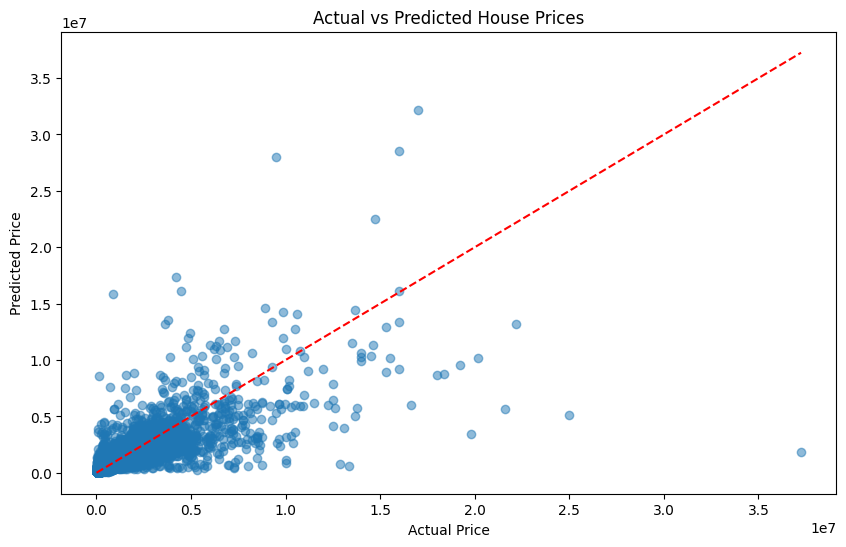

In [ ]:
# Visualize predicted vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_val, val_predictions, alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.show()

In [ ]:
# Train on the full training dataset for final predictions
full_model = LinearRegression()
full_model.fit(train_data_encoded, log_target)  # Train on log-transformed target

# Make predictions on test set
test_predictions_log = full_model.predict(test_data_encoded)
test_predictions = np.expm1(test_predictions_log)  # Convert back from log space

In [ ]:
# Create submission file
output=pd.DataFrame({"ID":test_data_encoded.ID, "price":test_predictions})
output.to_csv('submission.csv', index=False)